In [2]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA
from mne.decoding import CSP
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [4]:
%run AllFunctions2.ipynb

In [6]:
# Load All Subjects
subIds = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024']
all_epochs = []
all_labels = []

for subject in subIds:
    # Load EEG data
    raw = loadData(subject)    
    # ------------------------ 2. Preprocessing ------------------------
    raw.filter(1, 40, fir_design='firwin')  # Band-pass filter (1-40 Hz)
    raw.set_eeg_reference('average', projection=True)  # Re-reference EEG
    
    # Apply ICA for artifact removal
    performICA(raw)
    
    # ------------------------ 3. Define Events & Epochs ------------------------
    events = find_events(raw, stim_channel='Status')  #stimuli channel
    event_id = {
        'Symmetrical': 1,  
        'Asymmetrical': 3
    }    
    epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=1.0, baseline=(-0.2, 0),
                         picks='eeg', preload=True)
    
    # Append to global dataset
    all_epochs.append(epochs.get_data())  # EEG data
    all_labels.append(epochs.events[:, -1])  # Labels

Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-001/eeg/sub-001_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-001/eeg/sub-001_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy/Documents/SP EEG/pro_bids/sub-001/eeg/sub-001_task-jacobsen_channels.tsv.
Reading electrode coords from /Users/sammy/Documents/SP EEG/pro_bids/sub-001/eeg/sub-001_task-jacobsen_electrodes.tsv.
Reading 0 ... 531967  =      0.000 ...  1038.998 secs...


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.5s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
159 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
159 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 159 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-002/eeg/sub-002_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-002/eeg/sub-002_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.9s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-003/eeg/sub-003_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-003/eeg/sub-003_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.8s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-004/eeg/sub-004_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-004/eeg/sub-004_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.8s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:5: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (61) and smallest (4e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 16
  ica.fit(raw)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted fro

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
161 events found on stim channel Status
Event IDs: [    1     3 65536]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-005/eeg/sub-005_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-005/eeg/sub-005_task-jacobsen_events.tsv.
Reading channel info fro

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.6s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-006/eeg/sub-006_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-006/eeg/sub-006_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.2s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-007/eeg/sub-007_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-007/eeg/sub-007_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.1s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-008/eeg/sub-008_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-008/eeg/sub-008_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.1s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-009/eeg/sub-009_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-009/eeg/sub-009_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.1s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-010/eeg/sub-010_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-010/eeg/sub-010_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.6s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-011/eeg/sub-011_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-011/eeg/sub-011_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.7s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-012/eeg/sub-012_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-012/eeg/sub-012_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.3s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-013/eeg/sub-013_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-013/eeg/sub-013_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.8s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
161 events found on stim channel Status
Event IDs: [    1     3 65536]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-014/eeg/sub-014_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-014/eeg/sub-014_task-jacobsen_events.tsv.
Reading channel info fro

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 11.0s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-015/eeg/sub-015_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-015/eeg/sub-015_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.5s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-016/eeg/sub-016_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-016/eeg/sub-016_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.7s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
161 events found on stim channel Status
Event IDs: [    1     3 65536]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-017/eeg/sub-017_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-017/eeg/sub-017_task-jacobsen_events.tsv.
Reading channel info fro

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.5s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
161 events found on stim channel Status
Event IDs: [    1     3 65536]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-018/eeg/sub-018_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-018/eeg/sub-018_task-jacobsen_events.tsv.
Reading channel info fro

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.5s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:5: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (64) and smallest (2.3e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 5
  ica.fit(raw)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted fr

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-019/eeg/sub-019_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-019/eeg/sub-019_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.0s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-020/eeg/sub-020_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-020/eeg/sub-020_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.5s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-021/eeg/sub-021_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-021/eeg/sub-021_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.1s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
161 events found on stim channel Status
Event IDs: [    1     3 65536]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-022/eeg/sub-022_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-022/eeg/sub-022_task-jacobsen_events.tsv.
Reading channel info fro

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.0s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-023/eeg/sub-023_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-023/eeg/sub-023_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.3s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/sammy/Documents/SP EEG/pro_bids/sub-024/eeg/sub-024_task-jacobsen_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/sammy/Documents/SP EEG/pro_bids/sub-024/eeg/sub-024_task-jacobsen_events.tsv.
Reading channel info from /Users/sammy

/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: The number of channels in the channels.tsv sidecar file (72) does not match the number of channels in the raw data file (73). Will not try to set channel names.
  raw = read_raw_bids(bids_path)
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/3921119066.py:7: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: 'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P10', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'
  raw = read_raw_bids(bids_path)
/var/fold

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.3s.


/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(raw, ica, method='iclabel')
/var/folders/m6/tws1p1s95hq4nqmf8vg1ncch0000gn/T/ipykernel_29961/2578086535.py:8: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 20 ICA components
    Projecting back using 64 PCA components
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel Status
Event IDs: [1 3]
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 160 events and 615 original time points ...
0 bad epochs dropped


In [53]:
# Convert list to NumPy arrays
X = np.concatenate(all_epochs, axis=0)  # (n_total_epochs, n_channels, n_times)
y = np.concatenate(all_labels, axis=0)  # Labels

# Feature Extraction using CSP
csp = CSP(n_components=2, reg=None, log=True, norm_trace=False)

# Classification using LDA
lda = LinearDiscriminantAnalysis()

# Create a pipeline
pipeline = Pipeline([('CSP', csp), ('LDA', lda)])

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

Computing rank from data with rank=None
    Using tolerance 9.2e-05 (2.2e-16 eps * 64 dim * 6.5e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.


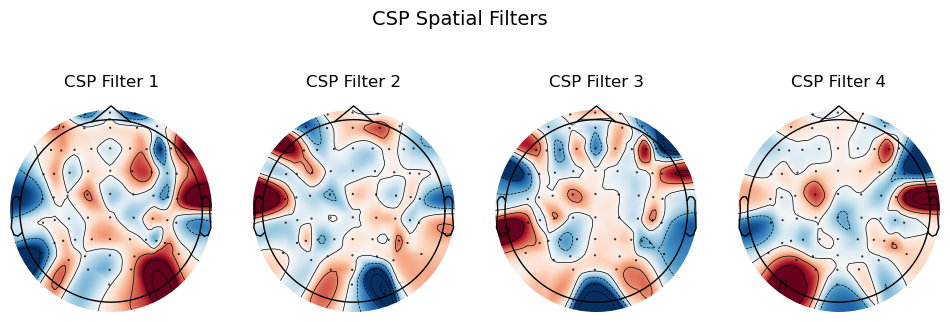

In [57]:
# plot CSP patterns
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, ax in enumerate(axes):
    mne.viz.plot_topomap(csp.patterns_[i], raw.info, axes=ax, show=False)
    ax.set_title(f'CSP Filter {i+1}')
plt.suptitle("CSP Spatial Filters", fontsize=14)
plt.show()

In [59]:
# Compute classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Classification Accuracy: {accuracy * 100:.2f}%")

LDA Classification Accuracy: 50.00%


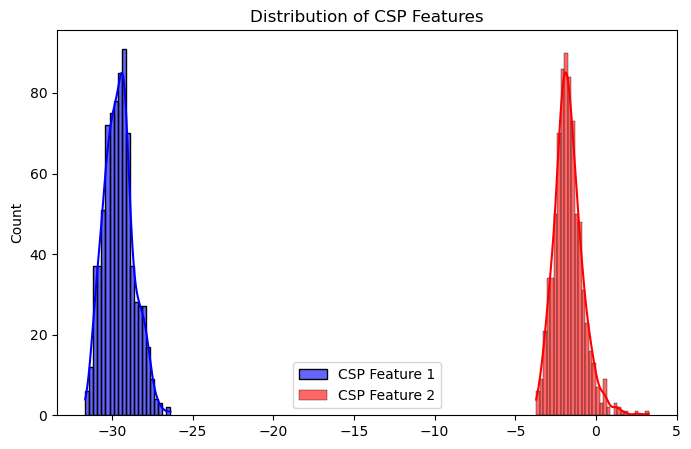

In [61]:
# Plot Feature Distributions
import seaborn as sns
csp_features = csp.transform(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(csp_features[:, 0], label="CSP Feature 1", kde=True, color="blue", alpha=0.6)
sns.histplot(csp_features[:, 1], label="CSP Feature 2", kde=True, color="red", alpha=0.6)
plt.legend()
plt.title("Distribution of CSP Features")
plt.show()

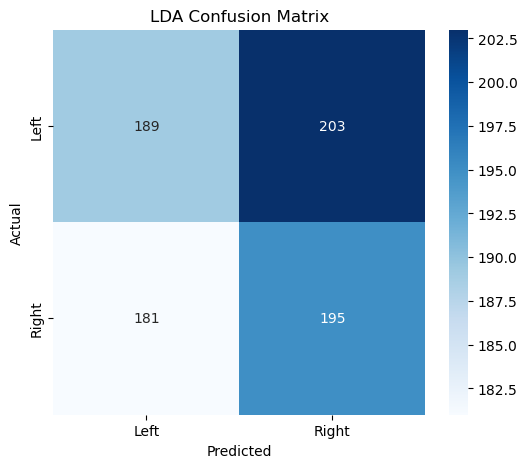

In [65]:
# ------------------------ 7. Plot Confusion Matrix ------------------------
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Left", "Right"], yticklabels=["Left", "Right"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LDA Confusion Matrix")
plt.show()